#各种梯度下降优化方法总结
https://blog.csdn.net/u012892939/article/details/80785593
#sklearn.linear_model.Ridge
alpha：正则化项的系数

copy_X：是否对X数组进行复制，默认为True，如果选False的话会覆盖原有X数组

fit_intercept：是否需要计算截距

max_iter：最大的迭代次数，对于sparse_cg和lsqr而言，默认次数取决于scipy.sparse.linalg，对于sag而言，则默认为1000次。

normalize：标准化X的开关，默认为False

solver：在计算过程中选择的解决器

auto：自动选择
svd：奇异值分解法，比cholesky更适合计算奇异矩阵
cholesky：使用标准的scipy.linalg.solve方法
sparse_cg：共轭梯度法，scipy.sparse.linalg.cg,适合大数据的计算
lsqr：最小二乘法，scipy.sparse.linalg.lsqr
sag：随机平均梯度下降法，在大数据下表现良好。
注：后四个方法都支持稀疏和密集数据，而sag仅在fit_intercept为True时支持密集数据。

tol：精度

random_state：sag的伪随机种子

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
# X is the 10x10 Hilbert matrix,A（i,j）=1/(i+j-1)
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [8]:
n_alphas = 200
#np.logspace(start=开始值，stop=结束值，num=元素个数，base=指定对数的底, endpoint=是否包含结束值)  默认以10为底
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    print(coefs)

[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849])]
[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909])]
[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   

[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


        23.14116268,  32.06035382])]
[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.371

[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


        2.92694408,  4.73650304,  6.14507558,  7.22592731,  8.04657834])]
[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.129

[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


[array([   2.64506203,  -27.60371093,    7.99289881,  133.67545177,
         18.04326075, -123.85503558, -175.62010261, -113.78632084,
         45.15379483,  274.02303849]), array([   2.7749527 ,  -30.12097818,   17.90676257,  125.42567363,
         10.71782513, -122.8663194 , -168.64645425, -106.59628723,
         46.70073864,  265.22298909]), array([   2.89641299,  -32.48098168,   27.218736  ,  117.65913798,
          3.83379579, -121.92543678, -162.07886417,  -99.83167   ,
         48.15084681,  256.93547767]), array([   3.00959587,  -34.68696905,   35.94233717,  110.36416662,
         -2.61956463, -121.03070985, -155.90695956,  -93.48138596,
         49.50640099,  249.1468185 ]), array([   3.1146896 ,  -36.74289595,   44.09396634,  103.52648663,
         -8.65486428, -120.18031156, -150.11799403,  -87.53262545,
         50.7701328 ,  241.84083705]), array([   3.21190962,  -38.65327129,   51.6922776 ,   97.12986966,
        -14.28640327, -119.37199777, -144.69786093,  -81.97067633,


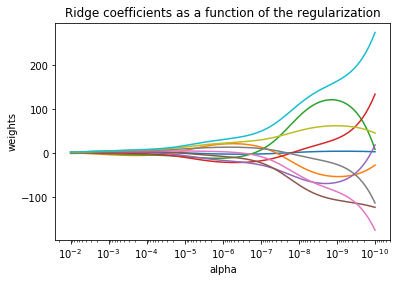

In [9]:
# Display results
#print(coefs)
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
#plt.axis('tight')
plt.show()